# Table of Contents
1. Basic Statistics 
2. World
3. USA
## 4. Individual City in USA

# 4. Individual City in USA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import geopandas as gpd
import plotly.express as px
from matplotlib.lines import Line2D
from math import pi

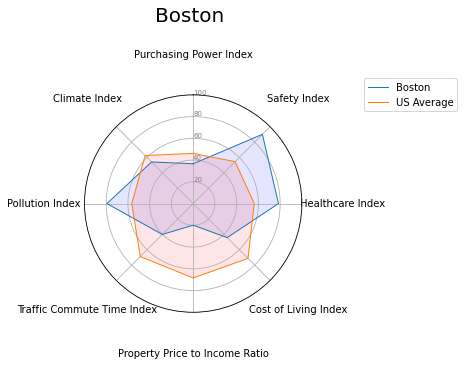

In [7]:
## Radar chart for individual city

# choose city and year
city = 'Boston'
year = 2022

# importing data

qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')
qol_chosen = qol_us.loc[(qol_us['City'] == city) & (qol_us['Year'] == year)]

# setting variables

categories = ['Purchasing Power Index', 'Safety Index', 'Healthcare Index', 'Cost of Living Index',
                     'Property Price to Income Ratio', 'Traffic Commute Time Index',
                     'Pollution Index','Climate Index']

N = len(categories)

# getting avarage 
qol_us_yr = qol_us[qol_us['Year'] == year]
qol_us_yr = qol_us_yr[categories].mean()


# 1: Create background

# the angle of each axis in the plot (divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the plot
ax = plt.subplot(111, polar=True)

# set the first axis to be on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80,100], ['20','40','60','80','100'], color='grey', size=7)
plt.ylim(0,100)

# 2: Add plots
 
# plot each individual = each line of the data
 
# chosen city
values = qol_chosen[categories].iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'{city}')
ax.fill(angles, values, 'b', alpha=0.1)
 
# average
values = qol_us_yr.values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='US Average')
ax.fill(angles, values, 'r', alpha=0.1)
 
# add legend
plt.legend(loc='center', bbox_to_anchor=(1.5, 1))

# add title
plt.title(f'{city} \n', fontsize=20)

# adjust labels
ax.tick_params(axis='both', which='major', pad=30)

plt.show()

In [9]:
# showing list of peer cities

# Choose criteria
us_city = 'Boston'
year = 2022
index_ = 'Quality of Life Index'
num_peer = 3  # if you choose 3 total number of peer is 6(up 3 and down 3) 

# importing data

qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')

# Sort dataframe according to Quality of Life Index
df = qol_us[(qol_us.Year==year)
                ].sort_values(by='Quality of Life Index', ascending=False).reset_index(drop=True)

# reset index so that index start from 1
df.index = np.arange(1, len(df)+1)

# finding index number for chosen city 
chosen_index = df[(df.City==us_city)].index.values.astype(int)[0]

# list up index numbers for peer group
index_range=[]
for i in range(num_peer*2+1):
    index_range.append(chosen_index-num_peer)
    chosen_index += 1

chosen_index_to_insert = int(np.median(index_range))

# remove irrelevant index numbers like 0, -1, -2 and numbers that are out of the rankings...   
index_range = [item for item in index_range if item > 0 and item <= len(df)]

# display the chosen city and the peers with chosen city highlighted

display_col = ['City', 'Quality of Life Index', 'Purchasing Power Index',
    'Safety Index', 'Healthcare Index', 'Cost of Living Index',
    'Property Price to Income Ratio', 'Traffic Commute Time Index',
    'Pollution Index', 'Climate Index']

df_peer_display = df.loc[index_range][display_col].style.apply(
    lambda x: ['background: lightgreen' if x.name == chosen_index_to_insert else '' for i in x], axis=1
    ).format({'Quality of Life Index': '{:,.1f}', 'Purchasing Power Index': '{:,.1f}','Safety Index': '{:,.1f}', 
    'Healthcare Index': '{:,.1f}', 'Cost of Living Index': '{:,.1f}','Property Price to Income Ratio': '{:,.1f}',
    'Traffic Commute Time Index': '{:,.1f}','Pollution Index': '{:,.1f}', 'Climate Index': '{:,.1f}'})

df_peer_display

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Healthcare Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
18,Portland,58.9,28.2,55.7,67.9,65.3,63.0,70.6,71.2,86.2
19,Orlando,58.3,45.0,55.8,30.7,86.6,80.1,62.2,63.4,82.0
20,Spokane,57.3,32.9,47.9,30.0,86.6,56.1,95.5,85.5,45.8
21,Boston,55.8,36.6,90.1,78.5,44.3,19.9,40.2,79.3,54.1
22,Boise,54.8,0.0,92.0,100.0,86.1,35.1,99.2,72.1,42.2
23,Saint Louis,53.6,44.9,10.6,98.4,89.7,94.3,86.5,55.6,59.6
24,Cleveland,53.5,47.2,25.9,96.4,68.8,99.6,69.9,56.3,56.6


In [10]:
## ranking change over the year

# choose city
city = 'Houston'

# importing ranking data

df_rank = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_ranking_USA.csv')

# extract year data for the chosen city
chosen_rows = df_rank.loc[(df_rank['City'] == city)].sort_values(by='Year', ascending=True)

# choose columns for display
columnsTitles = ['Year'] + chosen_rows.columns[2:-4].tolist()

# show result
rank_change_raw = chosen_rows[columnsTitles].set_index('Year').T

rank_change_raw

Year,2018,2019,2020,2021,2022
Quality of Life Index,20,29,32,32,16
Purchasing Power Index,6,4,7,2,1
Safety Index,27,36,38,42,43
Healthcare Index,10,15,16,21,22
Cost of Living Index,10,6,5,8,3
Property Price to Income Ratio,5,4,7,6,6
Traffic Commute Time Index,22,35,32,41,45
Pollution Index,29,39,40,44,47
Climate Index,11,14,14,14,14


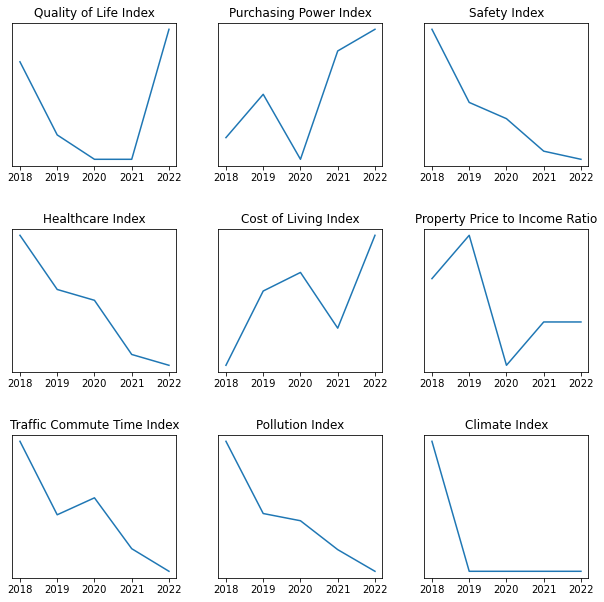

In [11]:
## visualize change in each index for the chosen city

# choose city
city = 'Houston'

# importing ranking data

df_rank = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_ranking_USA.csv')

# extract year data for the chosen city
chosen_rows = df_rank.loc[(df_rank['City'] == city)].sort_values(by='Year', ascending=True)

# choose columns for display
columnsTitles = ['Year'] + chosen_rows.columns[2:-4].tolist()

# show result
rank_change_raw = chosen_rows[columnsTitles].set_index('Year').T

# plotting
fig, axs = plt.subplots(3, 3, figsize=(9,9))
axs[0, 0].plot(rank_change_raw.iloc[0])
axs[0, 0].set_title(rank_change_raw.index[0])
axs[0, 0].invert_yaxis()
axs[0, 0].yaxis.set_visible(False)
axs[0, 1].plot(rank_change_raw.iloc[1])
axs[0, 1].set_title(rank_change_raw.index[1])
axs[0, 1].invert_yaxis()
axs[0, 1].yaxis.set_visible(False)
axs[0, 2].plot(rank_change_raw.iloc[2])
axs[0, 2].set_title(rank_change_raw.index[2])
axs[0, 2].invert_yaxis()
axs[0, 2].yaxis.set_visible(False)
axs[1, 0].plot(rank_change_raw.iloc[3])
axs[1, 0].set_title(rank_change_raw.index[3])
axs[1, 0].invert_yaxis()
axs[1, 0].yaxis.set_visible(False)
axs[1, 1].plot(rank_change_raw.iloc[4])
axs[1, 1].set_title(rank_change_raw.index[4])
axs[1, 1].invert_yaxis()
axs[1, 1].yaxis.set_visible(False)
axs[1, 2].plot(rank_change_raw.iloc[5])
axs[1, 2].set_title(rank_change_raw.index[5])
axs[1, 2].invert_yaxis()
axs[1, 2].yaxis.set_visible(False)
axs[2, 0].plot(rank_change_raw.iloc[6])
axs[2, 0].set_title(rank_change_raw.index[6])
axs[2, 0].invert_yaxis()
axs[2, 0].yaxis.set_visible(False)
axs[2, 1].plot(rank_change_raw.iloc[7])
axs[2, 1].set_title(rank_change_raw.index[7])
axs[2, 1].invert_yaxis()
axs[2, 1].yaxis.set_visible(False)
axs[2, 2].plot(rank_change_raw.iloc[8])
axs[2, 2].set_title(rank_change_raw.index[8])
axs[2, 2].invert_yaxis()
axs[2, 2].yaxis.set_visible(False)
fig.tight_layout(pad=3, w_pad=3, h_pad=3)

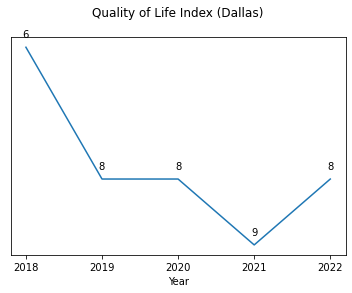

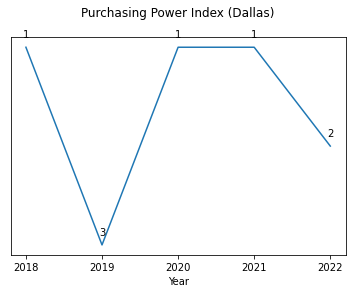

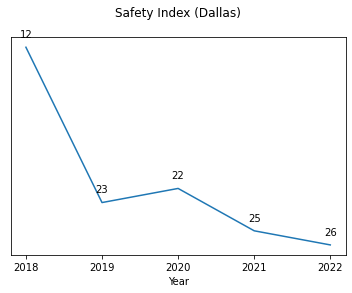

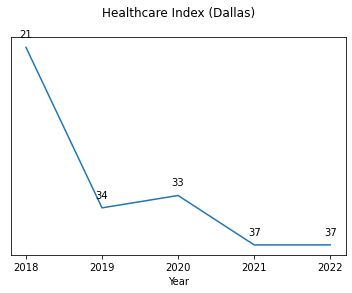

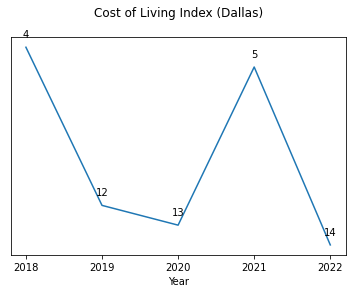

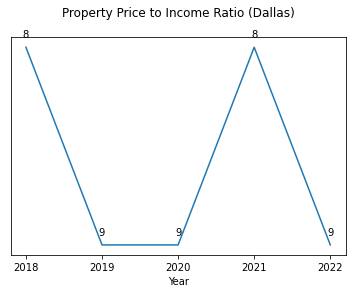

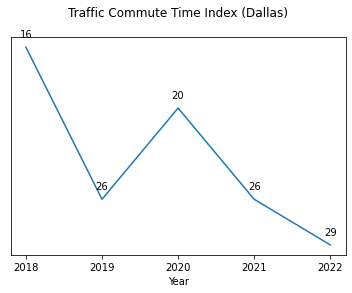

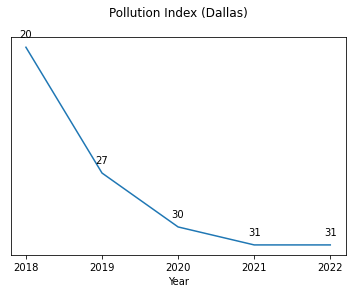

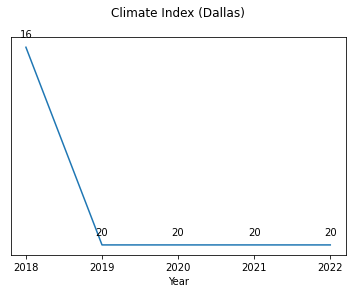

In [12]:
## visualizing each ranking change

# choose city
city = 'Dallas'

# importing ranking data

df_rank = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_ranking_USA.csv')

# extract year data for the chosen city
chosen_rows = df_rank.loc[(df_rank['City'] == city)].sort_values(by='Year', ascending=True)

# choose columns for display
columnsTitles = ['Year'] + chosen_rows.columns[2:-4].tolist()

# show result
rank_change_raw = chosen_rows[columnsTitles].set_index('Year').T

# plotting each index
for i in range(len(rank_change_raw.index)):
    
    df = rank_change_raw.iloc[i]
    df.plot()
    
    # inserting title
    plt.title(rank_change_raw.iloc[i].name + ' ('+ city + ')\n')

    # setting axis
    ax = plt.gca()
    ax.invert_yaxis()
    plt.xticks()
    plt.xticks(np.arange(min(rank_change_raw.columns), max(rank_change_raw.columns+1), 1.0))
    plt.ylabel('Ranking')
    
    
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)

    plt.grid(False)

    for x, y in zip(rank_change_raw.columns.tolist(), df.tolist()):
        label = y
        plt.annotate(label, (x,y), xycoords='data',
                     textcoords='offset points',
                     xytext=(0, 10), ha='center')
    plt.show()

In [ ]:
## 2 indexes that are changed the most

# choose city
city = 'Raleigh'

# extract yearly data for the chosen city
chosen_row = df_rank.loc[(df_rank['City'] == city)].sort_values(by='Year', ascending=True)

# choose columns for display
columnsTitles = ['Year'] + chosen_row.columns[2:-4].tolist()

# base table for plotting

rank_change_raw = chosen_row[columnsTitles].set_index('Year').T

diff_5yr_abs = []
for i in range(9):
    diff_5yr_abs.append(
        abs(
            (rank_change_raw.iloc[i].tolist()[0] - rank_change_raw.iloc[i].tolist()[-1])/rank_change_raw.iloc[i].tolist()[0])
        )

diff_5yr_abs

rank_change_diff = rank_change_raw.iloc[:]
rank_change_diff['diff_5yr_abs'] = diff_5yr_abs
sorted_rank_change = rank_change_diff.iloc[1:9].sort_values('diff_5yr_abs')


# defining notable ranking changes
Year = rank_change_raw.columns
d1 = rank_change_raw.iloc[0]
d_max1st_change = sorted_rank_change.iloc[-1][0:5].astype(int)
d_max2nd_change = sorted_rank_change.iloc[-2][0:5].astype(int)

df = pd.DataFrame({rank_change_raw.iloc[0].name : d1, 
                   sorted_rank_change.iloc[-1].name : d_max1st_change,
                   sorted_rank_change.iloc[-2].name : d_max2nd_change})
df.plot()

# inserting title
plt.title(f'Notable ranking changes in indexes (largest 2) : {city}\n')

# setting legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Overall(' + rank_change_raw.iloc[0].name + ')', 
          '1st largest change(last 5yrs): ' + d_max1st_change.name  ,
          '2nd largest change(last 5yrs) : ' + d_max2nd_change.name]

plt.legend(handles, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left', markerfirst = False)

# setting axis
ax = plt.gca()
ax.invert_yaxis()
plt.xticks()
plt.xticks(np.arange(min(rank_change_raw.columns), max(rank_change_raw.columns+1), 1.0))
plt.ylabel('Ranking')

# labelling values
for x, y in zip(rank_change_raw.columns.tolist(), d1.tolist()):
    label = y
    plt.annotate(label, (x,y), xycoords='data',
                 textcoords='offset points',
                 xytext=(0, 10), ha="center")
    
for x, y in zip(rank_change_raw.columns.tolist(), d_max1st_change.tolist()):
    label = y
    plt.annotate(label, (x,y), xycoords='data',
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")    

for x, y in zip(rank_change_raw.columns.tolist(), d_max2nd_change.tolist()):
    label = y
    plt.annotate(label, (x,y), xycoords='data',
                 textcoords='offset points',
                 xytext=(0, 10), ha='center')

plt.show()

In [ ]:
## 2 indexes that are changed the least 

# choose city
city = 'San Diego'

# extract yearly data for the chosen city
chosen_row = df_rank.loc[(df_rank['City'] == city)].sort_values(by='Year', ascending=True)

# choose columns for display
columnsTitles = ['Year'] + chosen_row.columns[2:-4].tolist()

# base table for plotting

rank_change_raw = chosen_row[columnsTitles].set_index('Year').T

diff_5yr_abs = []
for i in range(9):
    diff_5yr_abs.append(
        abs(
            (rank_change_raw.iloc[i].tolist()[0] - rank_change_raw.iloc[i].tolist()[-1])/rank_change_raw.iloc[i].tolist()[0])
        )
diff_5yr_abs

rank_change_diff = rank_change_raw.iloc[:]
rank_change_diff['diff_5yr_abs'] = diff_5yr_abs
sorted_rank_change = rank_change_diff.iloc[1:9].sort_values('diff_5yr_abs', ascending=False)


# defining notable ranking changes
Year = rank_change_raw.columns
d1 = rank_change_raw.iloc[0]
d_min1st_change = sorted_rank_change.iloc[-1][0:5].astype(int)
d_min2nd_change = sorted_rank_change.iloc[-2][0:5].astype(int)

df = pd.DataFrame({rank_change_raw.iloc[0].name : d1, 
                   sorted_rank_change.iloc[-1].name : d_min1st_change,
                   sorted_rank_change.iloc[-2].name : d_min2nd_change})
df.plot()

# inserting title
plt.title(f'Notable ranking changes in indexes(smallest 2) : {city}\n')

# setting legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Overall(' + rank_change_raw.iloc[0].name + ')', 
          '1st least change(last 5yrs): ' + d_min1st_change.name  ,
          '2nd least change(last 5yrs) : ' + d_min2nd_change.name]

plt.legend(handles, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left', markerfirst = False)

# setting axis
ax = plt.gca()
ax.invert_yaxis()
plt.xticks()
plt.xticks(np.arange(min(rank_change_raw.columns), max(rank_change_raw.columns+1), 1.0))
plt.ylabel('Ranking')

# labelling values
for x, y in zip(rank_change_raw.columns.tolist(), d1.tolist()):
    label = y
    plt.annotate(label, (x,y), xycoords='data',
                 textcoords='offset points',
                 xytext=(0, 10), ha='center')
for x, y in zip(rank_change_raw.columns.tolist(), d_min1st_change.tolist()):
    label = y
    plt.annotate(label, (x,y), xycoords='data',
                 textcoords='offset points',
                 xytext=(0, 10), ha='center')    

for x, y in zip(rank_change_raw.columns.tolist(), d_min2nd_change.tolist()):
    label = y
    plt.annotate(label, (x,y), xycoords='data',
                 textcoords='offset points',
                 xytext=(0, 10), ha='center')

plt.show()

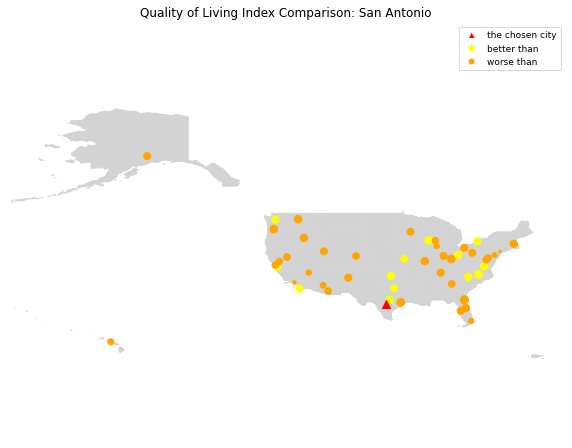

In [13]:
## Dot plot surveyed cities with variable colors on the map

# Choose city for analysis
us_city = 'San Antonio'
year = 2022

# importing data

qol_us = pd.read_csv('../02_data-wrangling/04_data/quality_of_life_index_5yrs_scale_geo_USA.csv')

# finding index of the chosen city
chosen_row_us = qol_us.loc[(qol_us['City'] == us_city)
              & (qol_us['Year'] == year)]

# importing map
usa = gpd.read_file('tl_2021_us_state.shp')
usa.head()

# Creating axes and plotting USA map
ax = usa.plot(color='lightgrey', figsize=(10, 10))
usa.plot(color='lightgrey', ax=ax)

# defining values for scatter plots
df_us = qol_us[qol_us['Year'] == year]

df_us_higher = df_us.loc[df_us['Quality of Life Index'] > chosen_row_us['Quality of Life Index'].item()]
x_high_us = df_us_higher['Longitude']
y_high_us = df_us_higher['Latitude']
z_high_us = df_us_higher['Quality of Life Index']
plt.scatter(x=x_high_us, y=y_high_us, s=z_high_us**0.9, c='yellow')

df_us_lower = df_us.loc[df_us['Quality of Life Index'] < chosen_row_us['Quality of Life Index'].item()]

x_low_us = df_us_lower['Longitude']
y_low_us = df_us_lower['Latitude'] 
z_low_us = df_us_lower['Quality of Life Index']
plt.scatter(x=x_low_us, y=y_low_us, s=z_low_us**1, c='orange')

df_us_chosen = df_us.loc[df_us['Quality of Life Index'] == chosen_row_us['Quality of Life Index'].item()]

x_chosen_us = df_us_chosen['Longitude']
y_chosen_us = df_us_chosen['Latitude'] 
z_chosen_us = df_us_chosen['Quality of Life Index']
plt.scatter(x=x_chosen_us, y=y_chosen_us, s=z_chosen_us, c='red', marker='^')

# Creating axis limits and title
plt.xlim([-180, -60])
plt.ylim([0, 90])
plt.title(f'Quality of Living Index Comparison: {us_city}')

# creating legend
custom_legend = [Line2D([0], [0], marker='^', color='w', markerfacecolor='r', markersize=7),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=7),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=7)]
plt.legend(custom_legend,['the chosen city','better than','worse than'], prop={'size': 9})

# removing outer axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.show()